In [1]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pylab import *
from scipy.optimize import fmin
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Introduction

We have a dataset about diabetes consisting of 50 columns (feature). We want to create a decision tree and a random forest model to predict if a patient has diabetes or not.

### Get dataset from file and inspect 5 rows

In [2]:
diabetes_df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
# diabetes_df = pd.read_csv('diabetes_dataset_updated.csv')
# print(diabetes_df.head())
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Description

### The target feature is readmitted column. The description and information about the features are provided in the columns' pdf.

### Print summary of dataset columns

In [3]:
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Methodology

### First we handled missing datas using different approaches such as deletion, averaging, and using the most common value (after turning ? signs in the dataset to None values).
### Then we processed data to turn numeral columns to categorical, so it would be viable for decision tree and random forest. Also, we deleted the unsuitable columns.
### Then set the target value, so the if readmitted is <30 the patient has diabetes.
### After processing the data, we used scikit-learn to train model for decision tree and random forest.
### Then we calculated the accuracy, precision, and recall of train and test data for decision tree and random forest.
### Finally, We showed the correlation of features and how much they are related to the target feature.

### Handling missing data (? should be turned into None)

In [4]:
diabetes_df.replace('?', None, inplace=True)
# diabetes_df1 = pd.read_csv('dataset_diabetes/diabetic_data.csv')
# diabetes_df['diag_1'] = diabetes_df1['diag_1']
# Creating a new dataset excel file
# updated_dataset_file = 'diabetes_dataset_updated.csv'
# diabetes_df.to_csv(updated_dataset_file, index=False)
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),None,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),None,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),None,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),None,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),None,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Check for missing data

In [5]:
print(diabetes_df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Weight and Payer_code columns are missing most of the data, so we can remove its column

In [6]:
diabetes_df.drop(['weight'], axis=1, inplace=True)
diabetes_df.drop(['payer_code'], axis=1, inplace=True)
print(diabetes_df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

### Diag_1 Diag_2 Diag_3 for these columns we can get the average and put it for missing data

In [7]:
mode_diag_1 = diabetes_df['diag_1'].mode().values[0]
diabetes_df['diag_1'].fillna(mode_diag_1, inplace=True)

mode_diag_2 = diabetes_df['diag_2'].mode().values[0]
diabetes_df['diag_2'].fillna(mode_diag_2, inplace=True)

mode_diag_3 = diabetes_df['diag_3'].mode().values[0]
diabetes_df['diag_3'].fillna(mode_diag_3, inplace=True)

print(diabetes_df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

### Race columns are missing half data, the best way to handle the missing data is to assign the most common data for the missing ones

In [8]:
# Get the most common data for race with ascending sort and number of use
sorted_data = diabetes_df['race'].value_counts().reset_index()
sorted_data.columns = ['race', 'count']
sorted_data = sorted_data.sort_values('count', ascending=False)

print(sorted_data)

mode_race = diabetes_df['race'].mode().values[0]
diabetes_df['race'].fillna(mode_race, inplace=True)

print(diabetes_df.isnull().sum())

              race  count
0        Caucasian  76099
1  AfricanAmerican  19210
2         Hispanic   2037
3            Other   1506
4            Asian    641
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                 

### Deleting unnecessary columns

### All the values of 'examide', 'citoglipton' were the same. 'encounter_id', 'patient_nbr', 'admission_source_id', 'medical_specialty' columns are ids, so they're irrelevant. Race was part of the data, but it turned out to be irrelevant.

In [9]:
columns_to_drop = ['encounter_id', 'patient_nbr', 'medical_specialty',
                'examide', 'citoglipton', 'race']
diabetes_df = diabetes_df.drop(columns_to_drop, axis=1)

### One-hot target column (readmitted)

In [10]:
# Replace values in 'readmitted' column
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace({'NO': 0, '>30': 0, '<30': 1})

### One-hot on gender column

In [11]:
# Assuming 'gender' is a categorical column in your 'diabetes_df' dataframe
gender_column = diabetes_df['gender']

# Perform one-hot encoding using pandas get_dummies()
gender_encoded_df = pd.get_dummies(gender_column, prefix='gender')

# Drop the original 'gender' column from diabetes_df
diabetes_df.drop('gender', axis=1, inplace=True)

# Concatenate the one-hot encoded dataframe with the original dataframe
diabetes_df = pd.concat([diabetes_df, gender_encoded_df], axis=1)

### One-hot on race column (Canceled)

In [12]:
# Assuming 'race' is a categorical column in your dataframe
# race_column = diabetes_df['race']

# Perform one-hot encoding using pandas get_dummies()
# race_encoded_df = pd.get_dummies(race_column, prefix='race')

# Drop the original 'race' column from diabetes_df
# diabetes_df.drop('race', axis=1, inplace=True)

# Concatenate the one-hot encoded dataframe with the original dataframe
# diabetes_df = pd.concat([diabetes_df, race_encoded_df], axis=1)

### One-hot on age column

In [13]:
diabetes_df['age'] = diabetes_df['age'].replace({
    '[0-10)': 10,
    '[10-20)': 20,
    '[20-30)': 30,
    '[30-40)': 40,
    '[40-50)': 50,
    '[50-60)': 60,
    '[60-70)': 70,
    '[70-80)': 80,
    '[80-90)': 90,
    '[90-100)': 100
})

### Removing decimal from diag1 to 3 and replace string values like (V50) to -1

In [14]:
diabetes_df['diag_1'] = diabetes_df['diag_1'].apply(lambda x: int(float(x)) if str(x).replace('.', '').isdigit() else -1)
diabetes_df['diag_2'] = diabetes_df['diag_2'].apply(lambda x: int(float(x)) if str(x).replace('.', '').isdigit() else -1)
diabetes_df['diag_3'] = diabetes_df['diag_3'].apply(lambda x: int(float(x)) if str(x).replace('.', '').isdigit() else -1)

### Change values of max_glu_serum column {'None': 0, '>300': 300, 'Norm': 1, '>200': 200}

In [15]:
# unique_values = diabetes_df['max_glu_serum'].unique()
# print(unique_values)
diabetes_df['max_glu_serum'] = diabetes_df['max_glu_serum'].map({'None': 0, '>300': 300, 'Norm': 1, '>200': 200})

### Change values of A1Cresult column {'None': 0, '>8': 8, 'Norm': 1, '>7': 7}

In [16]:
diabetes_df['A1Cresult'] = diabetes_df['A1Cresult'].map({'None': 0, '>8': 8, 'Norm': 1, '>7': 7})

### Change values of medical column {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}


In [17]:
diabetes_df['metformin'] = diabetes_df['metformin'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['repaglinide'] = diabetes_df['repaglinide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['nateglinide'] = diabetes_df['nateglinide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['chlorpropamide'] = diabetes_df['chlorpropamide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glimepiride'] = diabetes_df['glimepiride'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['acetohexamide'] = diabetes_df['acetohexamide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glipizide'] = diabetes_df['glipizide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glyburide'] = diabetes_df['glyburide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['tolbutamide'] = diabetes_df['tolbutamide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['pioglitazone'] = diabetes_df['pioglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['rosiglitazone'] = diabetes_df['rosiglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['acarbose'] = diabetes_df['acarbose'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['miglitol'] = diabetes_df['miglitol'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['troglitazone'] = diabetes_df['troglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['tolazamide'] = diabetes_df['tolazamide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['insulin'] = diabetes_df['insulin'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glyburide-metformin'] = diabetes_df['glyburide-metformin'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['metformin-rosiglitazone'] = diabetes_df['metformin-rosiglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glipizide-metformin'] = diabetes_df['glipizide-metformin'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glimepiride-pioglitazone'] = diabetes_df['glimepiride-pioglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['metformin-pioglitazone'] = diabetes_df['metformin-pioglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['change'] = diabetes_df['change'].map({'No': 0, 'Ch': 1})
diabetes_df['diabetesMed'] = diabetes_df['diabetesMed'].map({'No': 0, 'Yes': 1})

### Make chart for used columns

In [18]:
def plot_histograms(dataframe, columns, num_bins=50, figsize=(4, 4), xlim=None):
    for column in columns:
        plt.figure(figsize=figsize)
        plt.hist(dataframe[column], bins=num_bins, edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Distribution')

        if xlim:
            plt.xlim(xlim)

        plt.show()

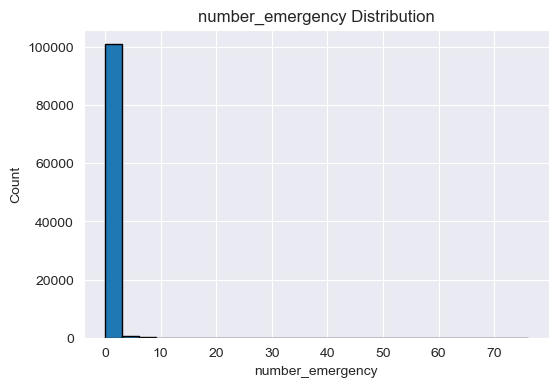

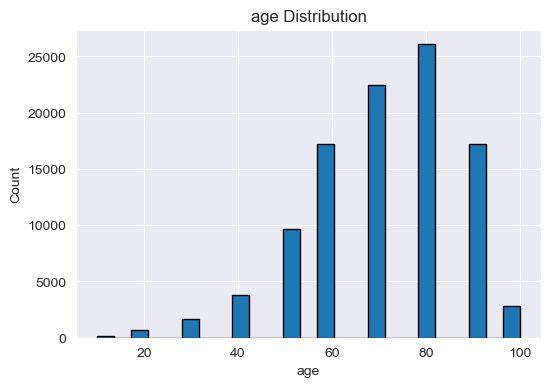

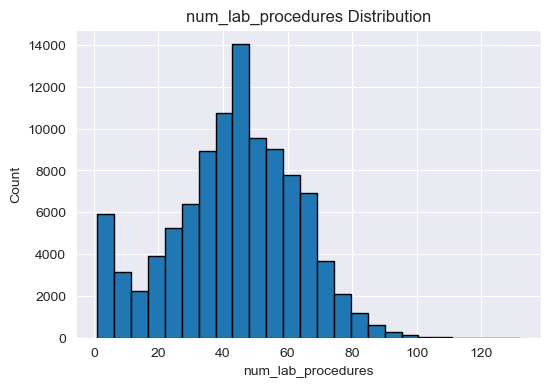

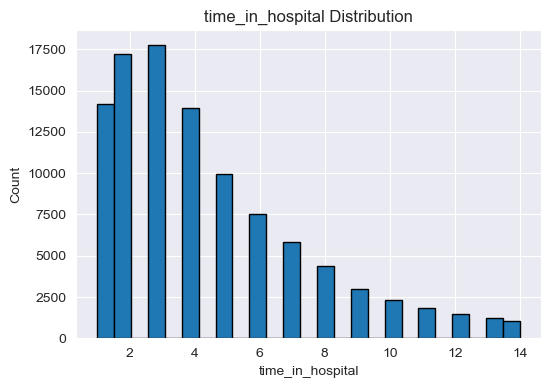

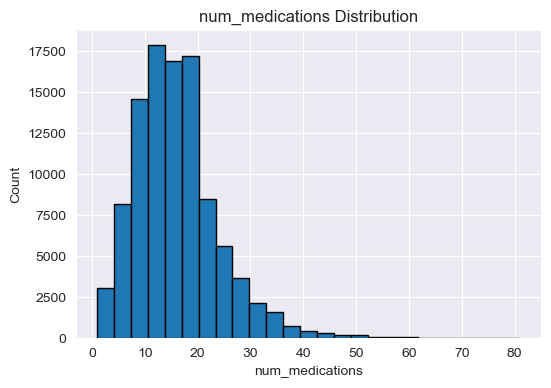

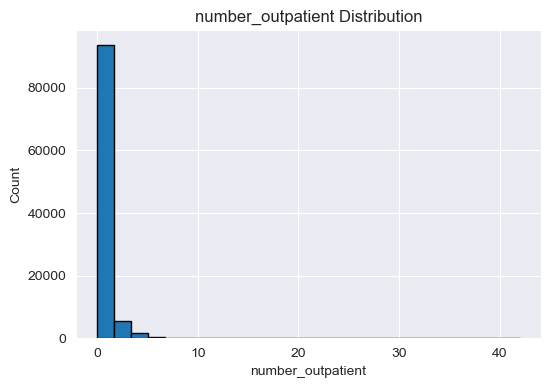

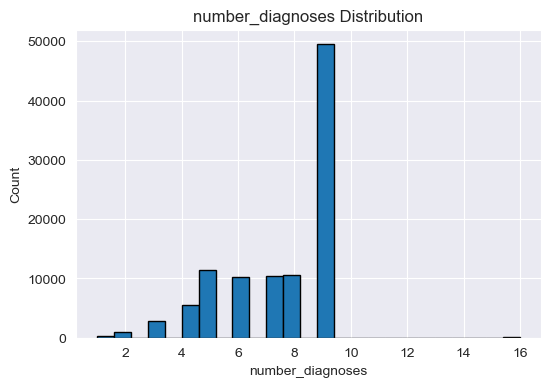

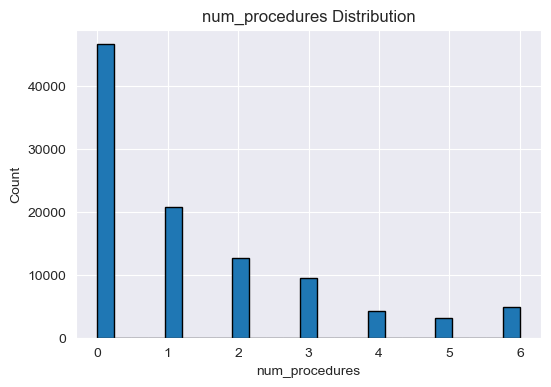

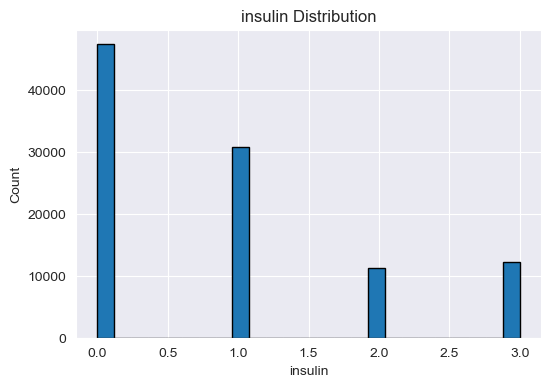

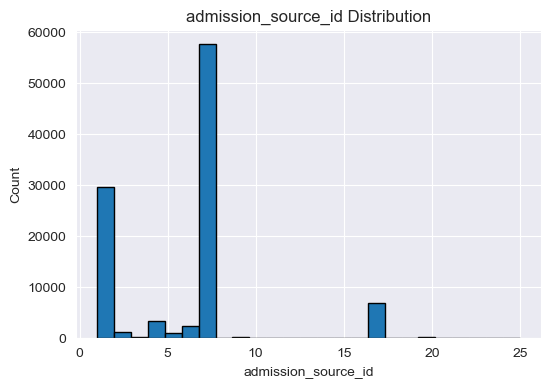

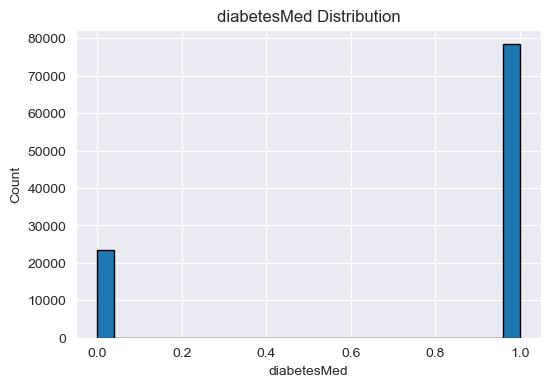

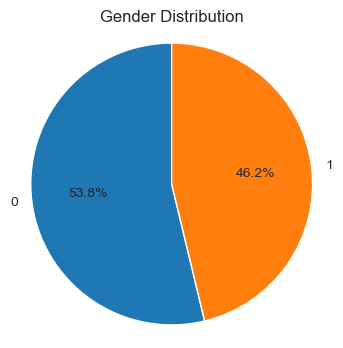

In [19]:
columns_to_plot = ['number_emergency', 'age', 'num_lab_procedures', 'time_in_hospital', 'num_medications', 'number_outpatient', 'number_diagnoses', 'num_procedures', 'insulin', 'admission_source_id', 'diabetesMed']

plot_histograms(diabetes_df, columns_to_plot, num_bins=25, figsize=(6, 4))

# Count the occurrences of each gender in the 'gender' column
gender_counts = diabetes_df['gender_Male'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

### After running and testing the models several times, we decided to remove these columns since they were irrelevant.

In [20]:
columns_to_drop = ['miglitol', 'acarbose', 'tolazamide', 'tolbutamide', 'chlorpropamide', 'acetohexamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone',
                'metformin-rosiglitazone', 'metformin-pioglitazone', 'gender_Unknown/Invalid', 'repaglinide', 'nateglinide', 'rosiglitazone', 'glyburide', 'glimepiride', 'gender_Male', 'gender_Female', 'glyburide-metformin']
diabetes_df = diabetes_df.drop(columns_to_drop, axis=1)

columns_to_drop = ['metformin', 'max_glu_serum', 'admission_type_id', 'glipizide', 'pioglitazone', 'change', 'discharge_disposition_id', 'number_inpatient']
diabetes_df = diabetes_df.drop(columns_to_drop, axis=1)

columns_to_drop = ['diag_3', 'diag_2', 'diag_1', 'A1Cresult']
diabetes_df = diabetes_df.drop(columns_to_drop, axis=1)

#### Seperated num columns into optimal ranges (didn't work out)

In [21]:
# def calculate_optimal_range(column_data):
#     column_data_list = column_data.tolist()  # Convert column_data to a list
#
#     q1 = np.percentile(column_data_list, 25)
#     q3 = np.percentile(column_data_list, 75)
#     iqr = q3 - q1
#     bin_width = 2 * iqr * math.pow(len(column_data_list), -1/3)
#
#     # Check if the bin_width is too small or zero
#     if bin_width <= 0:
#         return 1  # Set a minimum of 1 bin
#
#     num_bins = int((max(column_data_list) - min(column_data_list)) / bin_width) + 1
#     return num_bins
#
# def divide_into_ranges(original_columns):
#     if isinstance(original_columns[0], list):
#         num_columns = len(original_columns)
#         num_rows = len(original_columns[0])
#
#         range_columns = [[] for _ in range(num_columns)]
#
#         for col_idx in range(num_columns):
#             column_data = original_columns[col_idx]
#             num_bins = calculate_optimal_range(column_data)
#             bins = np.histogram_bin_edges(column_data, bins=num_bins)
#
#             for value in column_data:
#                 bin_idx = np.digitize(value, bins) - 1
#                 range_columns[col_idx].append(bin_idx)
#     else:
#         num_columns = 1
#         num_rows = len(original_columns)
#
#         range_columns = [[]]
#
#         column_data = original_columns
#         num_bins = calculate_optimal_range(column_data)
#         bins = np.histogram_bin_edges(column_data, bins=num_bins)
#
#         for value in column_data:
#             bin_idx = np.digitize(value, bins) - 1
#             range_columns[0].append(bin_idx)
#
#     return range_columns

In [22]:
# Assuming diabetes_df is your original DataFrame
#
# columns_to_iterate = ['number_emergency', 'num_medications', 'num_lab_procedures', 'number_diagnoses', 'num_procedures']  # Specify the columns to iterate over
#
# # Create a new DataFrame to store the divided range columns
# new_columns_df = pd.DataFrame()
#
# # Iterate over the specified columns
# for column in columns_to_iterate:
#     # Get the original column data
#     original_column = diabetes_df[column]
#
#     # Determine the optimal range size for the column
#     range_size = calculate_optimal_range(original_column)
#
#     # Divide the column into smaller columns with the specified range
#     divided_columns = divide_into_ranges(original_column)
#
#     # Add the divided columns to the new DataFrame
#     for i, divided_column in enumerate(divided_columns):
#         new_column_name = f'{column}_range_{i+1}'
#         new_columns_df[new_column_name] = divided_column
#
# # Concatenate the new columns DataFrame with the original diabetes_df
# diabetes_df = pd.concat([diabetes_df, new_columns_df], axis=1)

# Results

### You can see the accuracy, precision, F1-score and recall of the two models.

## Create decision tree using Scikit-learn

In [23]:
# Load the dataset
X = diabetes_df.drop('readmitted', axis=1)
y = diabetes_df['readmitted']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
maxF1 = 0
maxPrec = 0
maxRec= 0
maxF1_test = 0
maxPrec_test = 0
maxRec_test = 0
for i in range(10):
    # Create a decision tree classifier
    clf = DecisionTreeClassifier(max_depth=50, max_leaf_nodes=250)

    # Fit the classifier to the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_prediction_train = clf.predict(x_train)
    y_prediction_test = clf.predict(x_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_train, y_prediction_train)
    print("Accuracy Train:", accuracy)
    accuracy = accuracy_score(y_test, y_prediction_test)
    print("Accuracy:", accuracy)

    # Calculating precision and recall and F1-score
    precision_train = precision_score(y_train, y_prediction_train)
    precision_test = precision_score(y_test, y_prediction_test)
    recall_train = recall_score(y_train, y_prediction_train)
    recall_test = recall_score(y_test, y_prediction_test)
    f1_train = f1_score(y_train, y_prediction_train)
    f1_test = f1_score(y_test, y_prediction_test)

    # print("Precision Train:", precision_train)
    # print("Precision Test:", precision_test)
    # print("Recall Train:", recall_train)
    # print("Recall Test:", recall_test)
    # print("F1 Score Train:", f1_train)
    # print("F1 Score Test:", f1_test)
    if precision_train > maxPrec:
        maxPrec = precision_test
    if recall_train > maxRec:
        maxRec = recall_test
    if f1_train > maxF1:
        maxF1 = f1_test
    if precision_test > maxPrec_test:
        maxPrec_test = precision_test
    if recall_test > maxRec_test:
        maxRec_test = recall_test
    if f1_test > maxF1_test:
        maxF1_test = f1_test
print("\nPrecision Train:", maxPrec)
print("Precision Test:", maxPrec_test)
print("Recall Train:", maxRec)
print("Recall Test:", maxRec_test)
print("F1 score Train:", maxF1)
print("F1 Score Test:", maxF1_test)

Accuracy Train: 0.8916990124305999
Accuracy: 0.8848874914021814
Accuracy Train: 0.8916990124305999
Accuracy: 0.8848874914021814
Accuracy Train: 0.8916990124305999
Accuracy: 0.8847401002259998
Accuracy Train: 0.8916744460276126
Accuracy: 0.8848383610101208
Accuracy Train: 0.8916990124305999
Accuracy: 0.8850348825783629
Accuracy Train: 0.8917235788335872
Accuracy: 0.8849366217942419
Accuracy Train: 0.8916744460276126
Accuracy: 0.8849366217942419
Accuracy Train: 0.8916990124305999
Accuracy: 0.8846909698339392
Accuracy Train: 0.8916744460276126
Accuracy: 0.8847892306180604
Accuracy Train: 0.8916744460276126
Accuracy: 0.8847892306180604
Precision Train: 0.16666666666666666
Precision Test: 0.1839080459770115
Recall Train: 0.006564551422319475
Recall Test: 0.00700218818380744
F1 score Train: 0.01263157894736842
F1 Score Test: 0.013490725126475549


## Decision tree important features and chart


Decision Tree Feature Importance:
number_emergency: 0.17468294123589567
num_lab_procedures: 0.16091906188979582
time_in_hospital: 0.1302718455458594
num_medications: 0.12489779129739387
age: 0.09636222685153187
number_outpatient: 0.08348196588856904
number_diagnoses: 0.0721392804174236
num_procedures: 0.062389931266991897
insulin: 0.05757083220833704
admission_source_id: 0.029137179549018937
diabetesMed: 0.008146943849182717


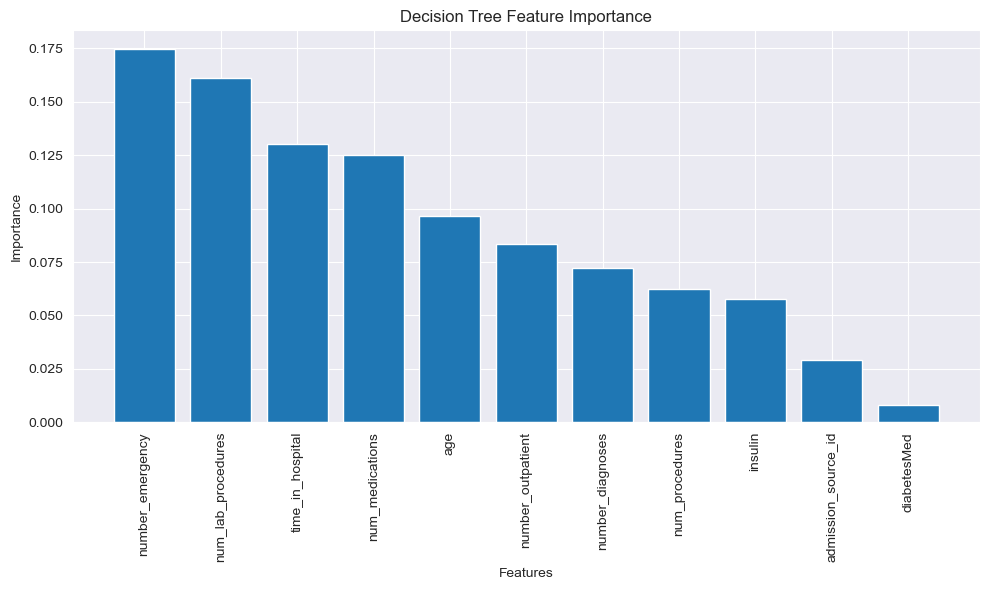

In [24]:
# Get feature importance and sort
dt_feature_importance = clf.feature_importances_
sorted_dt_indices = dt_feature_importance.argsort()[::-1]

# Print sorted feature importance ( didn't show the zero features )
print("\nDecision Tree Feature Importance:")
for i in sorted_dt_indices:
    if dt_feature_importance[i] != 0:
        print(f"{X.columns[i]}: {dt_feature_importance[i]}")


sorted_features = X.columns[sorted_dt_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(dt_feature_importance)), dt_feature_importance[sorted_dt_indices])
plt.xticks(range(len(dt_feature_importance)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

## Create random forest using Scikit-learn

In [25]:
# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=50, max_leaf_nodes=None)
maxF1 = 0
maxPrec = 0
maxRec= 0
maxF1_test = 0
maxPrec_test = 0
maxRec_test = 0
for i in range(10):
    # Fitting the model on the training data
    rf_classifier.fit(x_train, y_train)

    # Predicting on the test data
    y_prediction_train = rf_classifier.predict(x_train)
    y_prediction_test = rf_classifier.predict(x_test)

    # Evaluating the model
    accuracy = accuracy_score(y_train, y_prediction_train)
    print("Accuracy Train:", accuracy)
    accuracy = accuracy_score(y_test, y_prediction_test)
    print("Accuracy Test:", accuracy)
# Calculating precision and recall
    precision_train = precision_score(y_train, y_prediction_train, zero_division=0)
    precision_test = precision_score(y_test, y_prediction_test, zero_division=0)
    recall_train = recall_score(y_train, y_prediction_train, zero_division=0)
    recall_test = recall_score(y_test, y_prediction_test, zero_division=0)
    f1_train = f1_score(y_train, y_prediction_train)
    f1_test = f1_score(y_test, y_prediction_test)
    # print("Precision Train:", precision_train)
    # print("Precision Test:", precision_test)
    # print("Recall Train:", recall_train)
    # print("Recall Test:", recall_test)
    # print("F1 Score Train:", f1_train)
    if precision_train > maxPrec:
        maxPrec = precision_test
    if recall_train > maxRec:
        maxRec = recall_test
    if f1_train > maxF1:
        maxF1 = f1_test
    if precision_test > maxPrec_test:
        maxPrec_test = precision_test
    if recall_test > maxRec_test:
        maxRec_test = recall_test
    if f1_test > maxF1_test:
        maxF1_test = f1_test
print("\nPrecision Train:", maxPrec)
print("Precision Test:", maxPrec_test)
print("Recall Train:", maxRec)
print("Recall Test:", maxRec_test)
print("F1 score Train:", maxF1)
print("F1 Score Test:", maxF1_test)

Accuracy Train: 0.9987962462536235
Accuracy Test: 0.8842487963053945
Accuracy Train: 0.9988085294551172
Accuracy Test: 0.8846418394418788
Accuracy Train: 0.9988576622610917
Accuracy Test: 0.8845435786577577
Accuracy Train: 0.9988085294551172
Accuracy Test: 0.884297926697455
Accuracy Train: 0.9988208126566108
Accuracy Test: 0.8850840129704235
Accuracy Train: 0.9988576622610917
Accuracy Test: 0.8852805345386656
Accuracy Train: 0.9988576622610917
Accuracy Test: 0.8849857521863025
Accuracy Train: 0.9988330958581044
Accuracy Test: 0.8849366217942419
Accuracy Train: 0.9987839630521299
Accuracy Test: 0.8847401002259998
Accuracy Train: 0.9987839630521299
Accuracy Test: 0.884199665913334
Precision Train: 0.17272727272727273
Precision Test: 0.1951219512195122
Recall Train: 0.008315098468271335
Recall Test: 0.008315098468271335
F1 score Train: 0.015866388308977037
F1 Score Test: 0.015866388308977037


## Random forest important features and chart


Random Forest Feature Importance:
num_lab_procedures: 0.28031525167002413
num_medications: 0.20039715835251057
time_in_hospital: 0.10676757224891646
age: 0.09656629397413656
num_procedures: 0.07855200004567783
number_diagnoses: 0.06507893753739014
admission_source_id: 0.05619041921155352
insulin: 0.04221044704612745
number_outpatient: 0.038141040404146995
number_emergency: 0.021254099231487734
diabetesMed: 0.014526780278028653


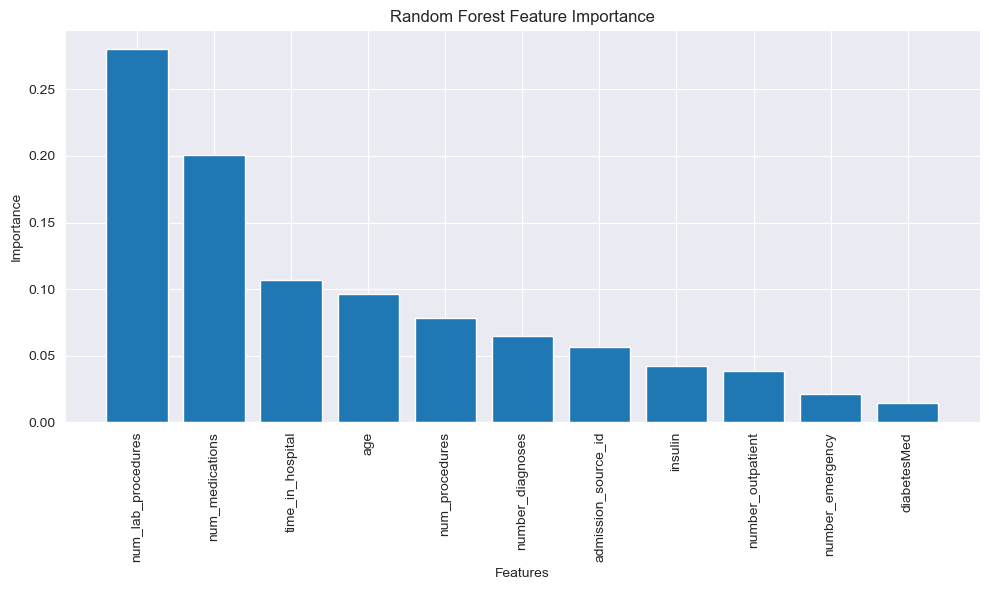

In [26]:
# Get feature importance and sort
rf_feature_importance = rf_classifier.feature_importances_
sorted_rf_indices = rf_feature_importance.argsort()[::-1]

# Print sorted feature importance
print("\nRandom Forest Feature Importance:")
for i in sorted_rf_indices:
    if rf_feature_importance[i] != 0:
        print(f"{X.columns[i]}: {rf_feature_importance[i]}")

# Sort feature importance and corresponding feature names
sorted_features = X.columns[sorted_rf_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_feature_importance)), rf_feature_importance[sorted_rf_indices])
plt.xticks(range(len(rf_feature_importance)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Discussion

number_emergency       0.060747
number_diagnoses       0.049524
time_in_hospital       0.044199
insulin                0.043005
num_medications        0.038432
diabetesMed            0.027125
num_lab_procedures     0.020364
number_outpatient      0.018893
age                    0.017634
num_procedures         0.012227
admission_source_id    0.005820
Name: readmitted, dtype: float64


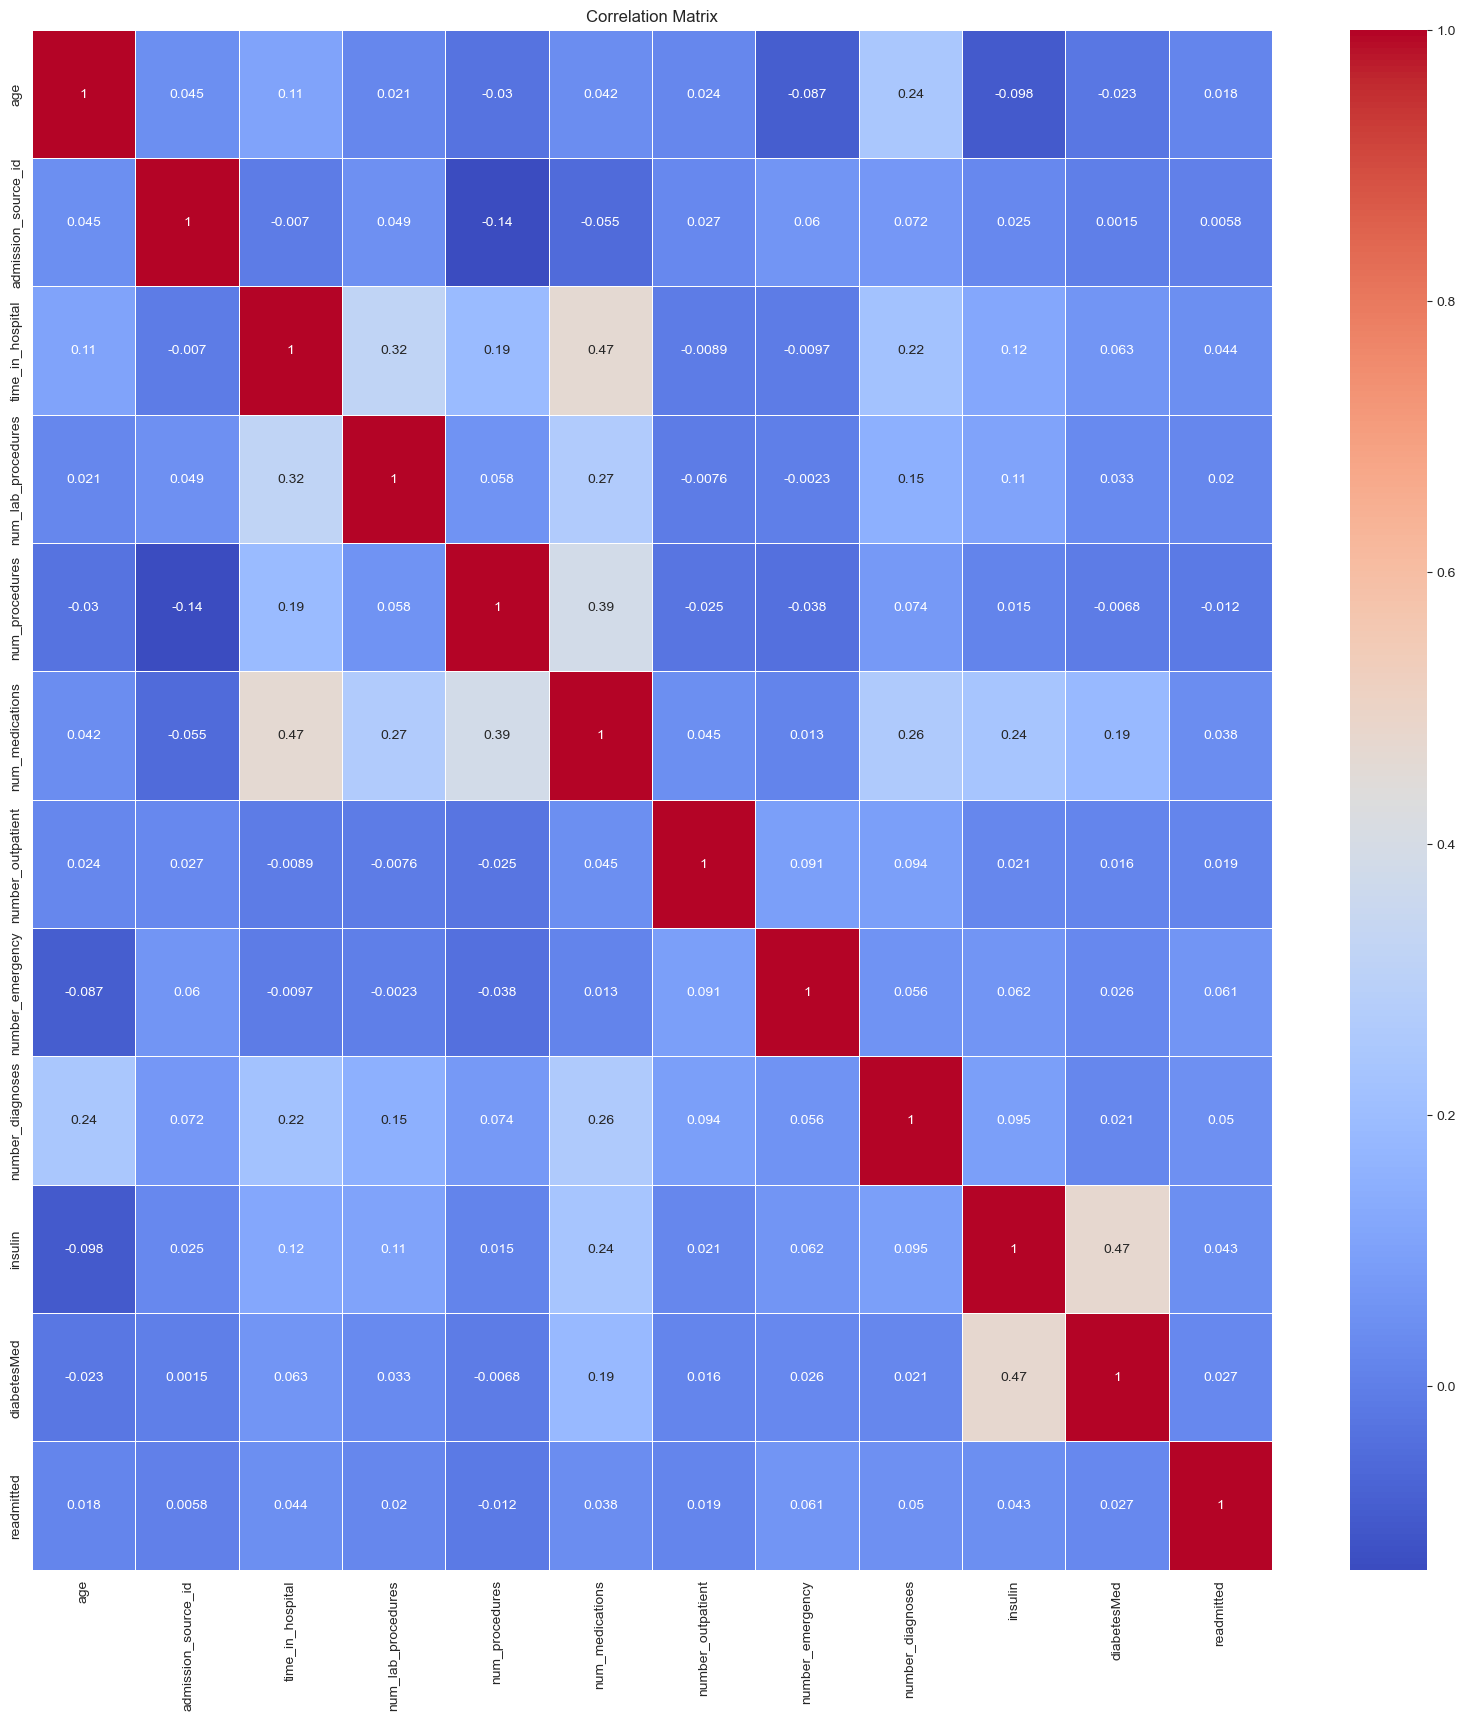

In [27]:
correlation_matrix = diabetes_df.corr()
# Get the correlation values of the 'readmitted' column with other columns
readmitted_correlation = correlation_matrix['readmitted'].drop('readmitted').abs().sort_values(ascending=False)
# Print the sorted correlation values
print(readmitted_correlation)

# Generate a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Conclusion